In [8]:
import re
import numpy as np
import pandas as pd


In [9]:
df = pd.read_csv("input/crdc-referrals-arrests-cleaned.csv", low_memory=False)


In [10]:
df = df[df.max_grade == 5]


<AxesSubplot: xlabel='year'>

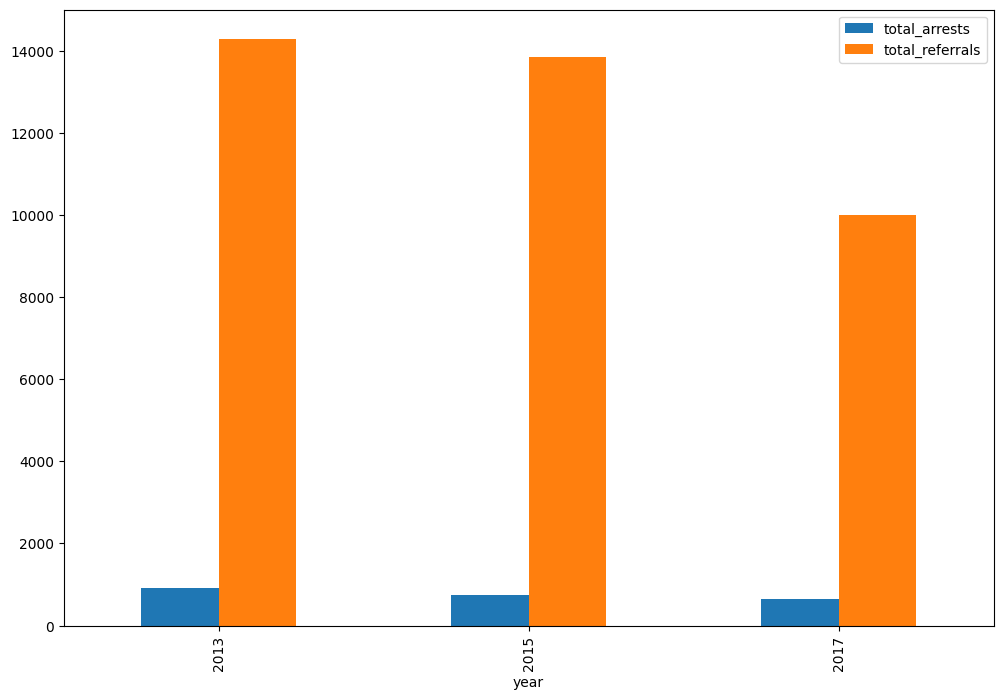

In [11]:
df.groupby("year")[["total_arrests", "total_referrals"]].sum().plot(kind="bar", figsize=(12, 8))


<AxesSubplot: title={'center': 'Arrests per 1,000 children'}, xlabel='year'>

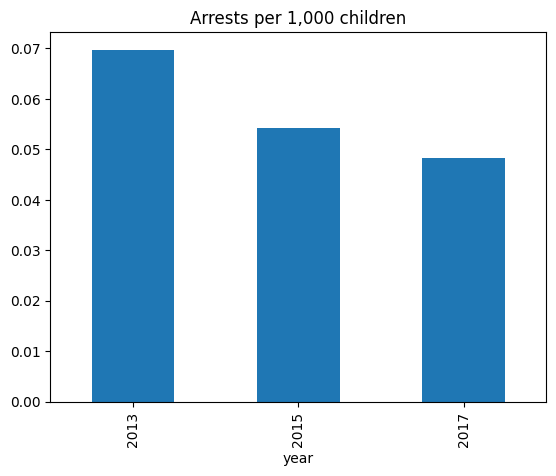

In [12]:
(
    df.groupby("year")[["total_arrests", "total_enrollment"]]
    .sum()
    .assign(arrest_rate=lambda df: df.total_arrests / df.total_enrollment)
    .arrest_rate.multiply(1000)
    .plot(kind="bar", title="Arrests per 1,000 children")
)


In [15]:
state_trends = pd.crosstab(
    index=df.LEA_STATE,
    columns=df.year,
    values=df.total_arrests,
    aggfunc="sum",
)

state_trends 


year,2013,2015,2017
LEA_STATE,,,
AK,0.0,0.0,0.0
AL,2.0,26.0,5.0
AR,12.0,2.0,1.0
AZ,18.0,10.0,24.0
CA,40.0,10.0,27.0
CO,0.0,2.0,5.0
CT,10.0,4.0,8.0
DC,2.0,0.0,0.0
DE,0.0,0.0,0.0


In [16]:
state_trends.to_excel("output/state_trends.xlsx")
